In [133]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %load_ext autoreload
# the "1" means: always reload modules marked with "%aimport"
# %autoreload 1

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import mpld3
import numpy as np
import pandas as pd
import os, sys
import warnings
from sqlalchemy import create_engine


In [134]:
from decouple import config
config.search_path = '/home/jovyan/work'

In [135]:
engine = create_engine(config('DATABASE_URL'))

## Load

In [136]:
sql = '''
SELECT        
    c.BillTo 
	,SUM(t.SalesAmt) AS SalesAmt
    ,SUM(t.ExtDiscAmt) / SUM(t.ExtBase) AS Disc_pct
    ,SUM(t.ExtBase) as ExtBase
    ,SUM(t.ExtDiscAmt) as ExtDiscAmt

FROM            
	BRS_AGG_CMI_DW_Sales AS t 

	INNER JOIN BRS_FiscalMonth AS m 
	ON t.FiscalMonth = m.FiscalMonth 

	INNER JOIN BRS_Customer AS c 
	ON t.Shipto = c.ShipTo 

	INNER JOIN BRS_FSC_Rollup AS f 
	ON f.TerritoryCd = c.TerritoryCd

	INNER JOIN BRS_Item AS i 
	ON t.Item = i.Item 
	

WHERE         
	(t.SalesCategory = 'MERCH') AND 
	(t.FreeGoodsInvoicedInd = 0)  And 
    (f.Branch not in ('CORP', 'ZCORP')) AND
	(t.FiscalMonth BETWEEN 201610 and 201709)

GROUP BY 
	c.Billto
Having 
    SUM(t.ExtBase) > 0 AND
    (SUM(t.SalesAmt) between  0 AND 100e3)AND
    SUM(t.ExtDiscAmt) > 0


'''

In [137]:
%time df = pd.read_sql_query(sql, engine);

CPU times: user 482 ms, sys: 9.34 ms, total: 491 ms
Wall time: 1.17 s


In [138]:
df.describe()

,BillTo,SalesAmt,Disc_pct,ExtBase,ExtDiscAmt
count,1.452600e+04,14526.000000,14526.000000,14526.000000,14526.000000
mean,2.172277e+06,12668.219591,0.125322,14320.383886,1652.164295
std,7.047344e+05,18657.790120,0.103340,21100.458072,3182.657075
min,1.526325e+06,0.000000,0.000000,0.010000,0.010000
25%,1.658178e+06,898.495000,0.050000,1057.905000,70.000000
50%,1.678379e+06,3999.815000,0.100000,4576.475000,404.370000
75%,2.816889e+06,16688.087500,0.170000,18815.840000,1797.687500
max,3.671333e+06,99918.620000,1.000000,131994.630000,52366.100000


## Cluster





In [139]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [140]:
X, y = make_blobs(n_samples=150,n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

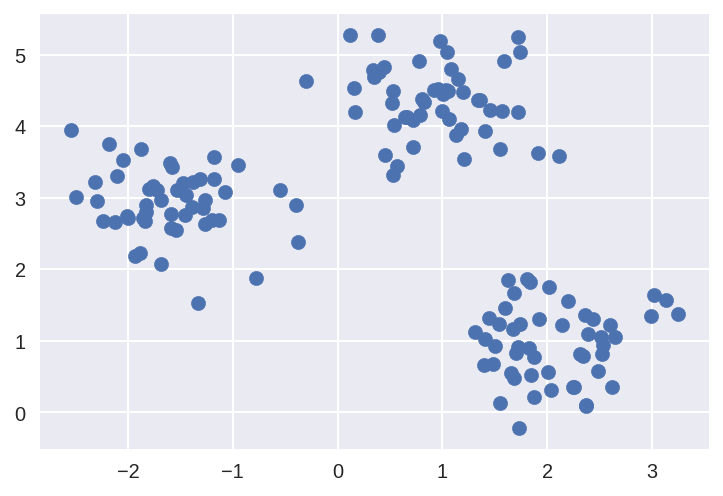

In [141]:
plt.scatter(X[:,0], X[:,1], marker='o', s=50);

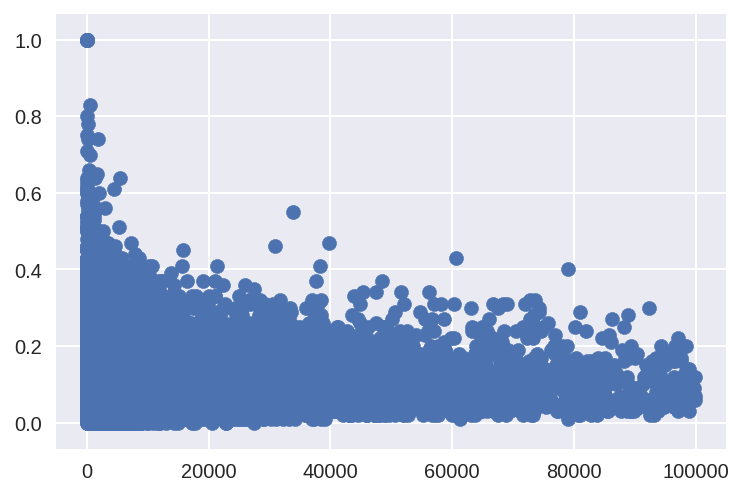

In [142]:
plt.scatter(df.iloc[:,1], df.iloc[:,2], marker='o');

In [143]:
km = KMeans(n_clusters=3, init='random', n_init=10,max_iter=300, tol = 1e-4, random_state=0)

In [144]:
y_km = km.fit_predict(X)

In [145]:
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)